In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [0]:
# Suppresses traininable weights realted warnings
def _check_trainable_weights_consistency(self):
    return
tf.keras.Model._check_trainable_weights_consistency = _check_trainable_weights_consistency

In [0]:
def plot_grid(images, rows, cols, figsize=(10, 10)):
    sample_ids = np.random.randint(0, images.shape[0], size=rows*cols)
    sample = images[sample_ids]
    f, ax_arr = plt.subplots(rows, cols, figsize=figsize)
    plt.set_cmap(plt.cm.Greys_r)
    index = 0
    for i in range(rows):
        for j in range(cols):
            ax_arr[i, j].imshow(sample[index])
            ax_arr[i, j].axis('off')
            index +=1
    plt.show()
    plt.close()

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_train = 2 * (x_train - 0.5)
print('Max value:', x_train.max())
print('Min value:', x_train.min())
print('Loaded dataset tensor size:', x_train.shape)
dataSize = x_train.shape[0]
dimSize = x_train.shape[1] * x_train.shape[2]

Max value: 1.0
Min value: -1.0
Loaded dataset tensor size: (60000, 28, 28)


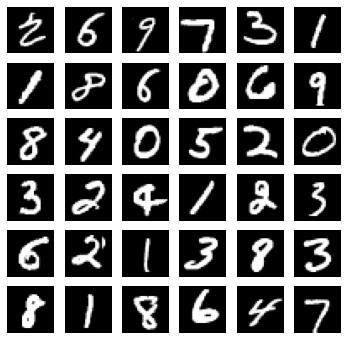

In [5]:
plot_grid(x_train, 6, 6, figsize=(6, 6))

### Define Generator Network

In [0]:
n_hidden = 128
z_dim = 100

# Generator
model_g = Sequential()
model_g.add(Dense(n_hidden, input_shape=(100,)))
model_g.add(LeakyReLU(0.01))
model_g.add(Dense(dimSize))
model_g.add(Activation('tanh'))

In [7]:
model_g.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation (Activation)      (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


### Define Discriminator Network

In [0]:
model_d = Sequential()
model_d.add(Dense(n_hidden, input_shape=(dimSize,)))
model_d.add(LeakyReLU(0.01))
model_d.add(Dense(2))
model_d.add(Activation('softmax'))

model_d.compile(Adam(learning_rate=0.0002, beta_1=0.5), loss=sparse_categorical_crossentropy)

In [9]:
model_d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________



### Define GAN

In [0]:
# Chain the generator and the discriminator together by feeding the output of the 
# generator to the discriminator. However, we do not want to update the discriminator
# while training the generator so the discriminator is frozen while training the generator
model_d.trainable = False
gan = Sequential([model_g, model_d])
gan.compile(Adam(learning_rate=0.0002, beta_1=0.5), loss=sparse_categorical_crossentropy)

# Total no. of epoch we want to train it for
maxEpoch = 20

In [11]:
# Check: The number of trainable parameters should be equal to that of the generator
gan.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 784)               114064    
_________________________________________________________________
sequential_1 (Sequential)    (None, 2)                 100738    
Total params: 214,802
Trainable params: 114,064
Non-trainable params: 100,738
_________________________________________________________________


### Training

In [0]:
# Hyperparameters
batchSize = 32
batchSizeHalf = batchSize / 2

# Total batches that can be created from the training set
nBatches = math.floor(dataSize / batchSizeHalf)

In [0]:
def get_real_batch(batchData, batchId, shuffle, batchSize):
    start_idx = int(batchId * batchSize)
    end_idx = int((batchId + 1) * batchSize)
    indices = shuffle[start_idx:end_idx]
    num_samples = indices.shape[0]
    return batchData[indices].reshape(num_samples, dimSize)

In [0]:
def get_fake_batch(generator, latent_dim, batchSize):
    z = np.random.rand(batchSize, latent_dim) - 0.5
    fakes = generator.predict(z)
    return fakes

100%|██████████| 3750/3750 [02:12<00:00, 28.35it/s]


Epoch 1  out of 20  done !!!


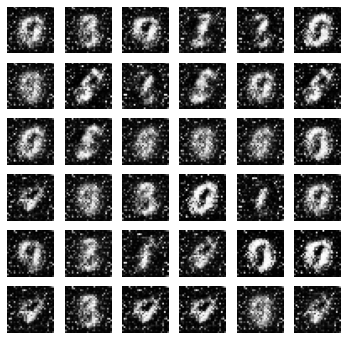

100%|██████████| 3750/3750 [02:12<00:00, 28.35it/s]


Epoch 2  out of 20  done !!!


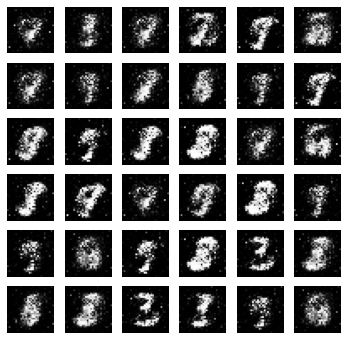

100%|██████████| 3750/3750 [02:13<00:00, 28.10it/s]


Epoch 3  out of 20  done !!!


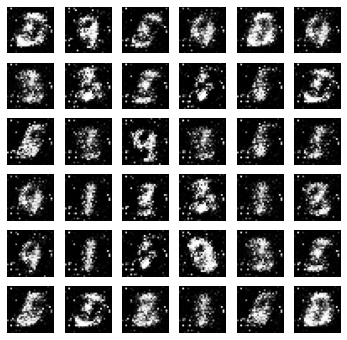

100%|██████████| 3750/3750 [02:07<00:00, 29.42it/s]


Epoch 4  out of 20  done !!!


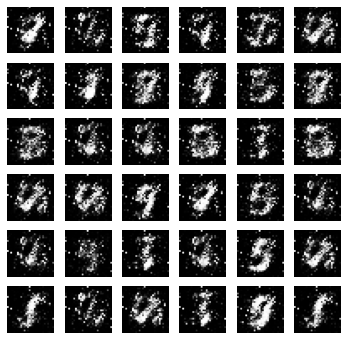

100%|██████████| 3750/3750 [02:09<00:00, 29.00it/s]


Epoch 5  out of 20  done !!!


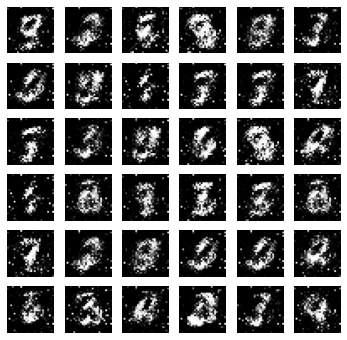

100%|██████████| 3750/3750 [02:08<00:00, 29.24it/s]


Epoch 6  out of 20  done !!!


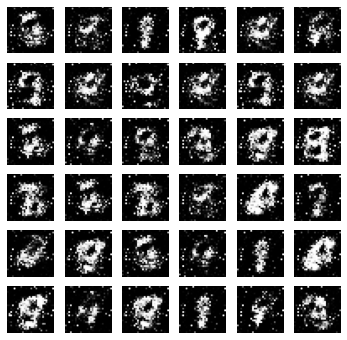

100%|██████████| 3750/3750 [02:08<00:00, 29.24it/s]


Epoch 7  out of 20  done !!!


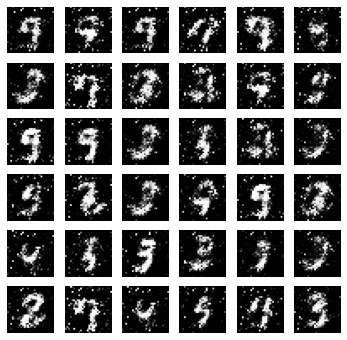

100%|██████████| 3750/3750 [02:09<00:00, 29.05it/s]


Epoch 8  out of 20  done !!!


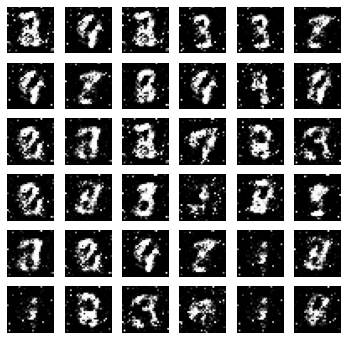

100%|██████████| 3750/3750 [02:09<00:00, 29.01it/s]


Epoch 9  out of 20  done !!!


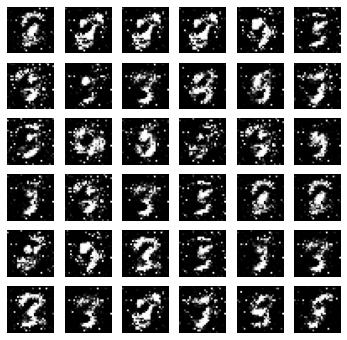

100%|██████████| 3750/3750 [02:09<00:00, 28.93it/s]


Epoch 10  out of 20  done !!!


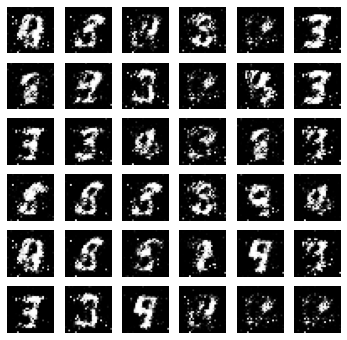

100%|██████████| 3750/3750 [02:07<00:00, 29.38it/s]


Epoch 11  out of 20  done !!!


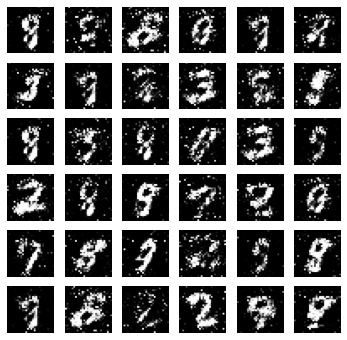

100%|██████████| 3750/3750 [02:08<00:00, 29.28it/s]


Epoch 12  out of 20  done !!!


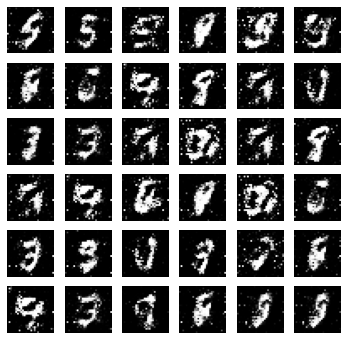

100%|██████████| 3750/3750 [02:07<00:00, 29.52it/s]


Epoch 13  out of 20  done !!!


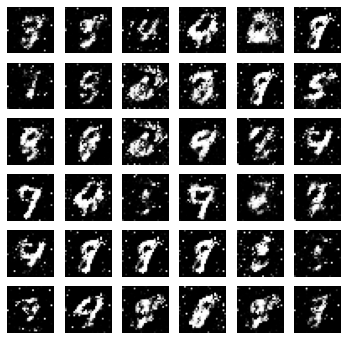

100%|██████████| 3750/3750 [02:06<00:00, 29.54it/s]


Epoch 14  out of 20  done !!!


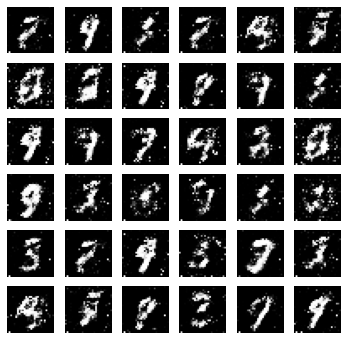

100%|██████████| 3750/3750 [02:07<00:00, 29.43it/s]


Epoch 15  out of 20  done !!!


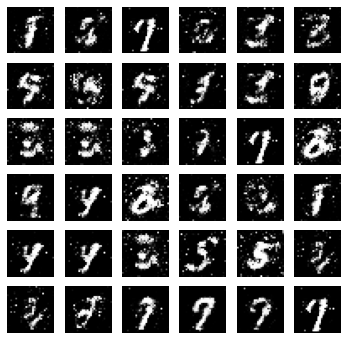

100%|██████████| 3750/3750 [02:06<00:00, 29.54it/s]


Epoch 16  out of 20  done !!!


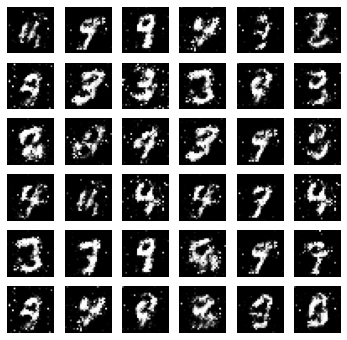

100%|██████████| 3750/3750 [02:07<00:00, 29.36it/s]


Epoch 17  out of 20  done !!!


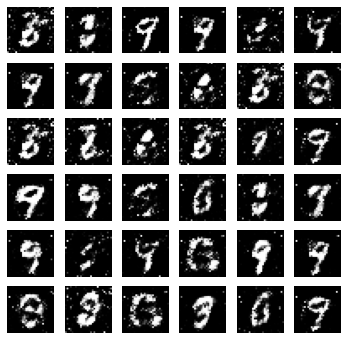

100%|██████████| 3750/3750 [02:07<00:00, 29.43it/s]


Epoch 18  out of 20  done !!!


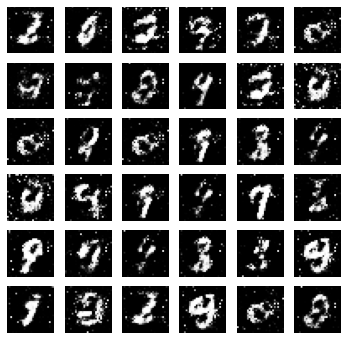

100%|██████████| 3750/3750 [02:07<00:00, 29.35it/s]


Epoch 19  out of 20  done !!!


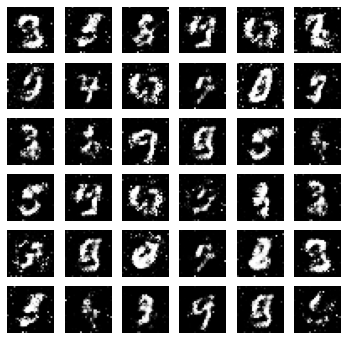

100%|██████████| 3750/3750 [02:07<00:00, 29.30it/s]


Epoch 20  out of 20  done !!!


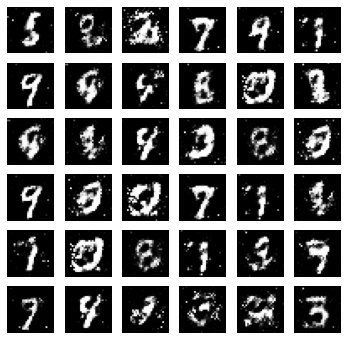

In [15]:
shuffle = np.arange(dataSize)

for epochId in range(maxEpoch):
    np.random.shuffle(shuffle)
    
    for batch_id in tqdm(range(nBatches)):
        # Train the discriminator
        x_real = get_real_batch(x_train, batch_id, shuffle, batchSizeHalf)
        y_real = np.ones((x_real.shape[0], 1))
        
        x_fake = get_fake_batch(model_g, z_dim, x_real.shape[0])
        y_fake = np.zeros((x_real.shape[0], 1))
        
        X, Y = np.vstack((x_real, x_fake)), np.vstack((y_real, y_fake))
        d_loss = model_d.train_on_batch(X, Y)
        
        # Train the generator 
        z = np.random.rand(batchSize, z_dim) - 0.5
        labels = np.ones((batchSize, 1))
        
        gan.train_on_batch(z, labels)
    
    print('Epoch', epochId + 1, ' out of', maxEpoch, ' done !!!')
    noise = np.random.rand(36, z_dim) - 0.5
    randImgs = model_g.predict(noise)
    randImgs = randImgs.reshape(36, 28, 28)
    plot_grid(randImgs, 6, 6, figsize=(6, 6))